In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\KAMALI--9-9--\Downloads\Data science\datasets\glass.csv")

In [3]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.drop(['Mg'],axis=1,inplace=True)

In [6]:
data


,RI,Na,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,1.94,73.61,0.00,8.48,1.57,0.0,7


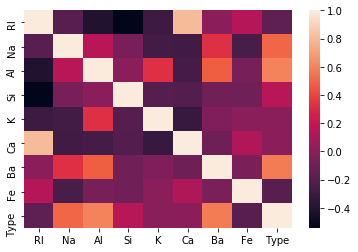

In [7]:
sns.heatmap(data.corr())

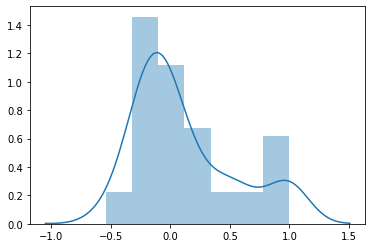

In [8]:
sns.distplot(data.corr())

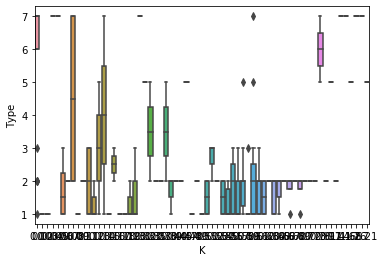

In [9]:
sns.boxplot(x='K',y='Type',data=data)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x=data.drop(['Type'],axis=1)

In [12]:
y=data.loc[:,'Type']

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lor=LogisticRegression()

In [16]:
lor.fit(xtrain,ytrain)

C:\Users\KAMALI--9-9--\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
ypred=lor.predict(xtest)

In [18]:
from sklearn.metrics import classification_report

In [19]:
print (classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.63      0.57      0.60        21
           2       0.39      0.63      0.48        19
           3       0.00      0.00      0.00         3
           5       1.00      0.17      0.29         6
           6       0.00      0.00      0.00         5
           7       0.83      0.91      0.87        11

    accuracy                           0.54        65
   macro avg       0.48      0.38      0.37        65
weighted avg       0.55      0.54      0.51        65



C:\Users\KAMALI--9-9--\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knnc=KNeighborsClassifier(n_neighbors=13)

In [22]:
knnc.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [23]:
ypred=knnc.predict(xtest)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.50      0.71      0.59        21
           2       0.48      0.58      0.52        19
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         6
           6       1.00      0.20      0.33         5
           7       0.88      0.64      0.74        11

    accuracy                           0.55        65
   macro avg       0.64      0.41      0.45        65
weighted avg       0.62      0.55      0.54        65



In [40]:
from sklearn.metrics import r2_score

In [41]:
print(r2_score(ytest,ypred))

0.6258170515097692


In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
knnr=KNeighborsRegressor()

In [32]:
knnr.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [33]:
ypred=knnr.predict(xtest)

In [34]:
from sklearn.metrics import r2_score

In [39]:
print(r2_score(ytest,ypred))

0.6258170515097692
